In [2]:
import random
from collections import Counter
from matplotlib import pyplot as plt


class Graph(object):
    """docstring for Graph"""
    def __init__(self, nodes=[], edges=[], directed=False):
        self._graph = dict()
        self._deg_dist = {}  # Degree Distribution
        if len(nodes):
            self._make_graph(nodes, edges, directed)

    def make_complete(self, num_nodes, directed=False):
        nodes = list(range(num_nodes))
        edges = [(node_1, node_2) for node_1 in nodes for node_2 in nodes if node_1 != node_2]
        self._make_graph(nodes, edges, directed)

    def _make_graph(self, nodes, edges, directed=False):
        for node in nodes:
            self._graph[node] = set()

        if not directed:
            edges = set([sorted(edge) for edge in edges])

        for edge in edges:
            self._graph[edge[0]].add(edge[1])

    def __contains__(self, value):
        return value in self._graph
    
    def __setitem__(self, node, edges):
        assert not (edges is set and node is int)
        self._graph[node] = edges
    
    def in_degrees(self):
        """
        Returns a dictionary of in-degrees of the nodes
        of the input digraph
        """
        degrees = dict.fromkeys(self._graph, 0)
        edges = []
        for value in self._graph.values():
            edges += list(value)
        for edge in edges:
            degrees[edge] += 1
        return degrees

    def compute_out_degrees(self):
        """Returns a dictionary of out-degrees of the nodes
        of the input digraph"""
        degrees = dict()
        for node in self._graph:
            degrees[node] = len(self._graph[node])
        return degrees

    def in_degree_distribution(self, normalized=False):
        """Returns the degree distribution of a digraph"""
        num_nodes = float(len(self._graph))
        degrees = self.in_degrees()
        self._deg_dist = dict(Counter(degrees.values()))
        if normalized:
            for degree in iter(self._deg_dist):
                self._deg_dist[degree] /= num_nodes
        return self._deg_dist

    def plot(self, log=True, file_name='', title='', xlabel='', ylabel='', color='#634017'):
        if log:
            plt.loglog(self._graph.keys(), self._graph.values(), 'o', color=color)
        else:
            plt.plot(self._graph.keys(), self._graph.values(), 'o', color=color)

        plt.title(title, fontsize=18, color='#ff8800')
        plt.xlabel(xlabel, fontsize=14, color='#ff8800')
        plt.ylabel(ylabel, fontsize=14, color='#ff8800')
        if file_name:
            plt.savefig(file_name, dpi=300, format='png', transparent=False, orientation='landscape', bbox_inches='tight', pad_inches=0.3)


In [3]:
NODES_0 = [0, 1, 2]
EDGES_0 = [(0, 1), (0, 2)]
EX_GRAPH0 = Graph(NODES_0, EDGES_0, True)

NODES_1 = [0, 1, 2, 3, 4, 5, 6]
EDGES_1 = [(0, 1), (0, 4), (0, 5),
           (1, 2), (1, 6), (2, 3),
           (3, 0), (4, 1), (5, 2)]
EX_GRAPH1 = Graph(NODES_1, EDGES_1, True)

NODES_2 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
EDGES_2 = [(0, 1), (0, 4), (0, 5),
           (1, 2), (1, 6), (2, 3),
           (2, 7), (3, 7), (4, 1),
           (5, 2), (7, 3), (8, 1),
           (8, 2), (9, 0), (9, 3),
           (9, 4), (9, 5), (9, 6),
           (9, 7)]
EX_GRAPH2 = Graph(NODES_2, EDGES_2, True)


In [98]:
def load_graph_data(file_name):
    """
    Function that loads a graph given a text
    representation of the graph

    Returns a dictionary that models a graph
    """
    graph_file = open(file_name)
    graph_text = graph_file.read()
    graph_lines = graph_text.split('\n')
    graph_lines = graph_lines[:-1]
    
    print("Loaded graph with", len(graph_lines), "nodes")
    
    nodes = []
    edges = []
    for line in graph_lines:
        neighbors = line.split(' ')
        node = int(neighbors[0])
        nodes.append(node)
        for neighbor in neighbors[1:-1]:
            edges.append((node, int(neighbor)))
    return nodes, edges

In [99]:
citation_graph_data = load_graph_data('alg_phys-cite.txt')

Loaded graph with 27770 nodes


Text(0,0.5,'Papers')

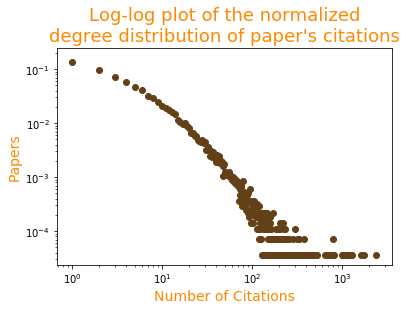

In [100]:
# Q1
citation_graph = Graph(*citation_graph_data, directed=True)
normalized_degree_dist = citation_graph.in_degree_distribution(normalized=True)

plt.loglog(normalized_degree_dist.keys(), normalized_degree_dist.values(), 'o', color='#634017')
plt.title("Log-log plot of the normalized\ndegree distribution of paper's citations", fontsize=18, color='#ff8800')
plt.xlabel("Number of Citations", fontsize=14, color='#ff8800')
plt.ylabel("Papers", fontsize=14, color='#ff8800')

# plt.savefig('Q1.jpg', dpi=300, format='png', transparent=False, orientation='landscape', bbox_inches='tight', pad_inches=0.3)

In [4]:
# Q4
class DPATrial:
    """
    Simple class to encapsulate optimized trials for DPA algorithm

    Maintains a list of node numbers with multiple instances of each number.
    The number of instances of each node number are
    in the same proportion as the desired probabilities

    Uses random.choice() to select a node number from this list for each trial.
    """
    def __init__(self, num_nodes):
        """
        Initialize a DPATrial object corresponding to a
        complete graph with num_nodes nodes

        Note the initial list of node numbers has num_nodes copies of
        each node number
        """
        self._num_nodes = num_nodes
        self._node_numbers = [node for node in range(num_nodes) for dummy_idx in range(num_nodes)]

    def run_trial(self, num_nodes):
        """
        Conduct num_node trials using by applying random.choice()
        to the list of node numbers

        Updates the list of node numbers so that the number of instances of
        each node number is in the same ratio as the desired probabilities

        Returns:
        Set of nodes
        """

        # compute the neighbors for the newly-created node
        new_node_neighbors = set()
        for dummy_idx in range(num_nodes):
            new_node_neighbors.add(random.choice(self._node_numbers))

        # update the list of node numbers so that each node number
        # appears in the correct ratio
        self._node_numbers.append(self._num_nodes)
        self._node_numbers.extend(list(new_node_neighbors))

        # update the number of nodes
        self._num_nodes += 1
        return new_node_neighbors



graph = Graph()
graph.make_complete(13, True)
trials = DPATrial(13)
for node in range(13, 27769):
    new_nodes = trials.run_trial(13)
    graph[node] = new_nodes

print(len(graph._graph))

# normalized_degree_dist = graph.in_degree_distribution(normalized=True)

# plt.loglog(normalized_degree_dist.keys(), normalized_degree_dist.values(), 'o', color='#634017')
# plt.title("Log-log plot of the normalized\nin-degree distribution of the DPA graph\nwith 27770 node and num of fixed edges", fontsize=18, color='#ff8800')
# plt.xlabel("Number of Citations", fontsize=14, color='#ff8800')
# plt.ylabel("Papers", fontsize=14, color='#ff8800')

# plt.savefig('Q4.png', dpi=300, format='png', transparent=False, orientation='landscape', bbox_inches='tight', pad_inches=0.3)

27769
